In [1]:
#

In [2]:
import pandas as pd
import os
import numpy as np

In [3]:
# Path to data folder relative to the notebook
DATA_DIR = os.path.join("..", "data", "processed")


In [4]:
bus_evasion_df = pd.read_csv(os.path.join(DATA_DIR, "bus_evasion_df.csv"))
subway_evasion_df = pd.read_csv(os.path.join(DATA_DIR, "subway_evasion_df.csv"))
ridership_df = pd.read_csv(os.path.join(DATA_DIR, "ridership_long.csv"))
quarterly_ridership_stats = pd.read_csv(os.path.join(DATA_DIR, "quarterly_stats.csv"))


In [5]:
# DataFrame where Metric = "Subways Total Estimated Ridership"
quarterly_ridership_bus_stats = quarterly_ridership_stats[
    (quarterly_ridership_stats["Metric"] == "Total Estimated Ridership") &
    (quarterly_ridership_stats["Mode"] == "Buses")
].copy()

# DataFrame where Metric = "% of Comparable Pre-Pandemic Day"
df_percent = ridership_df[ridership_df["Metric"] == "% of Comparable Pre-Pandemic Day"].copy()


In [6]:
quarterly_ridership_bus_stats

,Year,Quarter,Metric,Mode,Avg_Value,Var_Value,Sum_Value
7,2020,Q1,Total Estimated Ridership,Buses,1028122.06,7.292881e+11,31871784.0
21,2020,Q2,Total Estimated Ridership,Buses,16929.59,5.522727e+07,1540593.0
35,2020,Q3,Total Estimated Ridership,Buses,331568.61,1.976349e+11,30504312.0
49,2020,Q4,Total Estimated Ridership,Buses,907293.59,5.093318e+10,83471010.0
63,2021,Q1,Total Estimated Ridership,Buses,862352.43,5.384418e+10,77611719.0
77,2021,Q2,Total Estimated Ridership,Buses,1045234.60,5.732853e+10,95116349.0
91,2021,Q3,Total Estimated Ridership,Buses,1100630.43,7.668791e+10,101258000.0
105,2021,Q4,Total Estimated Ridership,Buses,1170128.24,1.247942e+11,107651798.0
119,2022,Q1,Total Estimated Ridership,Buses,1084874.78,1.204031e+11,97638730.0
133,2022,Q2,Total Estimated Ridership,Buses,1209488.24,9.779274e+10,110063430.0


In [7]:
bus_evasion_df_total = bus_evasion_df[bus_evasion_df["Trip Type"]=="Total"].copy()

# Left join on Mode, Year, and Quarter
df_joined_bus = quarterly_ridership_bus_stats.merge(
    bus_evasion_df_total,
    on=["Mode", "Year", "Quarter"],
    how="inner",
    suffixes=("_ridership", "_percent")
)
df_joined_bus

# Drop duplicate rows based on Mode, Year, Quarter
df_deduped = df_joined_bus.drop_duplicates(subset=["Mode", "Year", "Quarter"]).copy()
df_deduped = df_deduped[['Mode','Year','Quarter','Fare Evasion','Sum_Value']]
#df_deduped

In [8]:
df_deduped

,Mode,Year,Quarter,Fare Evasion,Sum_Value
0,Buses,2020,Q4,0.2307,83471010.0
1,Buses,2021,Q1,0.2492,77611719.0
2,Buses,2021,Q2,0.2466,95116349.0
3,Buses,2021,Q3,0.2599,101258000.0
4,Buses,2021,Q4,0.3003,107651798.0
5,Buses,2022,Q1,0.3242,97638730.0
6,Buses,2022,Q2,0.3316,110063430.0
7,Buses,2022,Q3,0.3372,107806455.0
8,Buses,2022,Q4,0.3722,108438209.0
9,Buses,2023,Q1,0.3852,108300158.0


In [9]:
bus_evasion_df_total = bus_evasion_df[bus_evasion_df["Trip Type"]=="Total"].copy()
# Left join on Mode, Year, and Quarter
df_joined_bus = df_percent.merge(
    bus_evasion_df_total,
    on=["Mode", "Year", "Quarter"],
    how="inner",
    suffixes=("_ridership", "_percent")
)
df_joined_bus

# Drop duplicate rows based on Mode, Year, Quarter
df_deduped_1 = df_joined_bus.drop_duplicates(subset=["Mode", "Year", "Quarter"]).copy()
df_deduped_1 = df_deduped_1[['Mode','Year','Quarter','Fare Evasion','Value']].rename(columns={"Value": "% Pre-Covid Passengers"})
df_deduped_1

,Mode,Year,Quarter,Fare Evasion,% Pre-Covid Passengers
0,Buses,2020,Q4,0.2307,0.51
92,Buses,2021,Q1,0.2492,0.41
182,Buses,2021,Q2,0.2466,0.47
273,Buses,2021,Q3,0.2599,0.53
365,Buses,2021,Q4,0.3003,0.66
457,Buses,2022,Q1,0.3242,0.29
547,Buses,2022,Q2,0.3316,0.65
638,Buses,2022,Q3,0.3372,0.59
730,Buses,2022,Q4,0.3722,0.55
822,Buses,2023,Q1,0.3852,0.52


In [10]:
df_joined_bus_final = df_deduped_1.merge(
    df_deduped,
    on=["Mode", "Year", "Quarter"],
    how="inner",
    suffixes=("_ridership", "_percent")
)

df_joined_bus_final = df_joined_bus_final[['Mode','Year','Quarter','% Pre-Covid Passengers','Sum_Value', 'Fare Evasion_ridership']]

df_joined_bus_final

,Mode,Year,Quarter,% Pre-Covid Passengers,Sum_Value,Fare Evasion_ridership
0,Buses,2020,Q4,0.51,83471010.0,0.2307
1,Buses,2021,Q1,0.41,77611719.0,0.2492
2,Buses,2021,Q2,0.47,95116349.0,0.2466
3,Buses,2021,Q3,0.53,101258000.0,0.2599
4,Buses,2021,Q4,0.66,107651798.0,0.3003
5,Buses,2022,Q1,0.29,97638730.0,0.3242
6,Buses,2022,Q2,0.65,110063430.0,0.3316
7,Buses,2022,Q3,0.59,107806455.0,0.3372
8,Buses,2022,Q4,0.55,108438209.0,0.3722
9,Buses,2023,Q1,0.52,108300158.0,0.3852


In [11]:
def assign_base_fare_precise(row):
    year = row["Year"]
    quarter = row["Quarter"]
    if year < 2023:
        return 2.75
    elif year == 2023:
        if quarter in ["Q1", "Q2"]:
            return 2.75
        else:
            return 2.90
    else:
        return 2.90

df_joined_bus_final["Base_Fare"] = df_joined_bus_final.apply(assign_base_fare_precise, axis=1)

#Passenger Average Pre Covid
df_joined_bus_final['NoCovid Ridership Volume'] = (df_joined_bus_final['Sum_Value'] / df_joined_bus_final['% Pre-Covid Passengers'])

#Paying_Passengers
df_joined_bus_final['Paying Passengers'] = df_joined_bus_final['Sum_Value'] * (1-df_joined_bus_final['Fare Evasion_ridership'])

#Find Pre-Covid fare evasion
# Distribution parameters
mean = 0.2373
std_dev = np.sqrt(0.0009)  # ≈ 0.03
n = len(df_joined_bus_final)

# Generate random multipliers from N(0.2373, 0.03^2)
multipliers = np.random.normal(loc=mean, scale=std_dev, size=n)

# Multiply each row in 'base_value' by a corresponding random sample
#df["adjusted_value"] = df["base_value"] * multipliers

#FewerPassengers Pre vs Post Covid
df_joined_bus_final['Fewer Passengers'] = df_joined_bus_final['NoCovid Ridership Volume'] - df_joined_bus_final['Sum_Value']

#Expected Paying_Passengers
df_joined_bus_final['Expected Paying Passengers'] = df_joined_bus_final['NoCovid Ridership Volume'] * (1-multipliers)

#Fewer Paying Passengers pre vs Post Covid
df_joined_bus_final['Fewer Paying Passengers'] = df_joined_bus_final['Expected Paying Passengers'] - df_joined_bus_final['Paying Passengers']

#Revenue Lost, Assuming No Covid and Fare Evasion Stays the Same as pre Covid - This is the situation the MTA
#looking at before the Covid events.
df_joined_bus_final['Revenue Lost_Covid_RisingEvasion'] = df_joined_bus_final['Fewer Paying Passengers']* multipliers * df_joined_bus_final["Base_Fare"]

#Revenue Lost, Due to Strictly Fare Evasion because of current levels
df_joined_bus_final['Revenue_Lost_FareEvasion'] = df_joined_bus_final['Sum_Value'] * df_joined_bus_final['Fare Evasion_ridership']* df_joined_bus_final["Base_Fare"]

#Revenue Lost, Had Covid Happened but Fare Evasion rise was not seen
df_joined_bus_final['Revenue_Lost_FareEvasion_precovid'] = df_joined_bus_final['Sum_Value'] * multipliers * df_joined_bus_final["Base_Fare"]


#Percent Difference of Fares Collected Covid vs Pre Covid
df_joined_bus_final['%Fares_NowvsPreCovid'] = df_joined_bus_final['Fare Evasion_ridership'] - multipliers

#Ridership Percent Change PreCovid vs Now
df_joined_bus_final['%PaidRiders_NowvsPreCovid'] = df_joined_bus_final['Paying Passengers']/df_joined_bus_final['Expected Paying Passengers']

#Revenue, Due to Strictly Fare Evasion because of current levels
df_joined_bus_final['Revenue'] = df_joined_bus_final['Sum_Value'] * (1 - df_joined_bus_final['Fare Evasion_ridership'])* df_joined_bus_final["Base_Fare"]

#Effective Fare per Rider
df_joined_bus_final['effective_fare_paid_per_rider'] = df_joined_bus_final['Revenue']/ df_joined_bus_final['Sum_Value']

#Effective Fare Loss per Rider
df_joined_bus_final['effective_fare_loss_per_rider'] = df_joined_bus_final["Base_Fare"] - df_joined_bus_final['effective_fare_paid_per_rider']

#Non Paying Passengers
df_joined_bus_final['NoPay_Passengers'] = df_joined_bus_final["Sum_Value"] - df_joined_bus_final['Paying Passengers']


# Format % columns to percentages (2 decimal points)
#df_joined_bus_final["% Pre-Covid Passengers"] = (df_joined_bus_final["% Pre-Covid Passengers"] * 100).round(2)
#df_joined_bus_final["Fare_Evasion"] = (df_joined_bus_final["Fare_Evasion"] * 100).round(2)

# Convert Passengers to integer
#df_joined_bus_final["Passengers"] = df_joined_bus_final["Passengers"].astype(int)

df_joined_bus_final


,Mode,Year,Quarter,% Pre-Covid Passengers,Sum_Value,Fare Evasion_ridership,Base_Fare,NoCovid Ridership Volume,Paying Passengers,Fewer Passengers,...,Fewer Paying Passengers,Revenue Lost_Covid_RisingEvasion,Revenue_Lost_FareEvasion,Revenue_Lost_FareEvasion_precovid,%Fares_NowvsPreCovid,%PaidRiders_NowvsPreCovid,Revenue,effective_fare_paid_per_rider,effective_fare_loss_per_rider,NoPay_Passengers
0,Buses,2020,Q4,0.51,83471010.0,0.2307,2.75,1.636686e+08,6.421425e+07,8.019764e+07,...,5.815419e+07,4.035529e+07,5.295610e+07,5.792354e+07,-0.021640,0.524762,1.765892e+08,2.115575,0.634425,1.925676e+07
1,Buses,2021,Q1,0.41,77611719.0,0.2492,2.75,1.892969e+08,5.827088e+07,1.116852e+08,...,8.030506e+07,5.917243e+07,5.318731e+07,5.718786e+07,-0.018744,0.420498,1.602449e+08,2.064700,0.685300,1.934084e+07
2,Buses,2021,Q2,0.47,95116349.0,0.2466,2.75,2.023752e+08,7.166066e+07,1.072589e+08,...,6.965274e+07,5.779407e+07,6.450315e+07,7.892239e+07,-0.055126,0.507104,1.970668e+08,2.071850,0.678150,2.345569e+07
3,Buses,2021,Q3,0.53,101258000.0,0.2599,2.75,1.910528e+08,7.494105e+07,8.979483e+07,...,7.077793e+07,4.618487e+07,7.237162e+07,6.607409e+07,0.022616,0.514285,2.060879e+08,2.035275,0.714725,2.631695e+07
4,Buses,2021,Q4,0.66,107651798.0,0.3003,2.75,1.631088e+08,7.532396e+07,5.545699e+07,...,5.113383e+07,3.159726e+07,8.890155e+07,6.652155e+07,0.075597,0.595645,2.071409e+08,1.924175,0.825825,3.232783e+07
5,Buses,2022,Q1,0.29,97638730.0,0.3242,2.75,3.366853e+08,6.598425e+07,2.390465e+08,...,1.809415e+08,1.326561e+08,8.704981e+07,7.158322e+07,0.057602,0.267223,1.814567e+08,1.858450,0.891550,3.165448e+07
6,Buses,2022,Q2,0.65,110063430.0,0.3316,2.75,1.693284e+08,7.356640e+07,5.926492e+07,...,5.569829e+07,3.624061e+07,1.003668e+08,7.161380e+07,0.094997,0.569114,2.023076e+08,1.838100,0.911900,3.649703e+07
7,Buses,2022,Q3,0.59,107806455.0,0.3372,2.75,1.827228e+08,7.145412e+07,7.491635e+07,...,6.548712e+07,4.512181e+07,9.996893e+07,7.428059e+07,0.086648,0.521787,1.964988e+08,1.822700,0.927300,3.635234e+07
8,Buses,2022,Q4,0.55,108438209.0,0.3722,2.75,1.971604e+08,6.807751e+07,8.872217e+07,...,8.134657e+07,5.416280e+07,1.109919e+08,7.220116e+07,0.130081,0.455599,1.872131e+08,1.726450,1.023550,4.036070e+07
9,Buses,2023,Q1,0.52,108300158.0,0.3852,2.75,2.082695e+08,6.658294e+07,9.996938e+07,...,8.947267e+07,6.168559e+07,1.147224e+08,7.466592e+07,0.134496,0.426662,1.831031e+08,1.690700,1.059300,4.171722e+07


In [12]:
graph_1 = df_joined_bus_final[['Year','Quarter','NoPay_Passengers','Paying Passengers']]
graph_1 = graph_1[graph_1["Year"] < 2025]

# Get the absolute path to the project root
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Construct the full path to the output file
output_path = os.path.join(project_root, "data", "processed", "graph_1.csv")

# Save the CSV
graph_1.to_csv(output_path, index=False)
graph_1

,Year,Quarter,NoPay_Passengers,Paying Passengers
0,2020,Q4,1.925676e+07,6.421425e+07
1,2021,Q1,1.934084e+07,5.827088e+07
2,2021,Q2,2.345569e+07,7.166066e+07
3,2021,Q3,2.631695e+07,7.494105e+07
4,2021,Q4,3.232783e+07,7.532396e+07
5,2022,Q1,3.165448e+07,6.598425e+07
6,2022,Q2,3.649703e+07,7.356640e+07
7,2022,Q3,3.635234e+07,7.145412e+07
8,2022,Q4,4.036070e+07,6.807751e+07
9,2023,Q1,4.171722e+07,6.658294e+07


In [13]:
graph_2 = df_joined_bus_final[['Year','Quarter','Fare Evasion_ridership']]

# Get the absolute path to the project root
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Construct the full path to the output file
output_path = os.path.join(project_root, "data", "processed", "graph_2.csv")

# Save the CSV
graph_2.to_csv(output_path, index=False)
graph_2

,Year,Quarter,Fare Evasion_ridership
0,2020,Q4,0.2307
1,2021,Q1,0.2492
2,2021,Q2,0.2466
3,2021,Q3,0.2599
4,2021,Q4,0.3003
5,2022,Q1,0.3242
6,2022,Q2,0.3316
7,2022,Q3,0.3372
8,2022,Q4,0.3722
9,2023,Q1,0.3852


In [ ]:
graph_2 = df_joined_bus_final[['Year','Quarter','Fare Evasion_ridership']]

# Get the absolute path to the project root
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Construct the full path to the output file
output_path = os.path.join(project_root, "data", "processed", "graph_2.csv")

# Save the CSV
graph_2.to_csv(output_path, index=False)
graph_2

In [14]:
#KPI Calculation
# KPI 0: Number of Passengers Average 2024
sum_2024_ridership = df_joined_bus_final[df_joined_bus_final['Year'] == 2024]['Sum_Value'].sum()
sum_2024_ridership = round(sum_2024_ridership)
print(sum_2024_ridership)

# KPI 1: Overall fare evasion rate (average across all rows)
avg_fare_evasion = df_joined_bus_final['Fare Evasion_ridership'].mean()

# KPI 2: Total revenue lost from fare evasion
total_revenue_lost = df_joined_bus_final['Revenue_Lost_FareEvasion'].sum()

# KPI 3: Average % of fares now vs pre-Covid
avg_fares_now_vs_precovid = df_joined_bus_final['%Fares_NowvsPreCovid'].mean()

# KPI 4: Average % of paid riders now vs pre-Covid
avg_paid_riders_now_vs_precovid = df_joined_bus_final['%PaidRiders_NowvsPreCovid'].mean()

# KPI 5: Max and Min quarterly revenue loss from fare evasion
max_revenue_lost = df_joined_bus_final['Revenue_Lost_FareEvasion'].max()
min_revenue_lost = df_joined_bus_final['Revenue_Lost_FareEvasion'].min()

# KPI 6: Total paying passengers vs expected
total_paying = df_joined_bus_final['Paying Passengers'].sum()
expected_paying = df_joined_bus_final['Expected Paying Passengers'].sum()
percent_paying_vs_expected = total_paying / expected_paying

# KPI 7: Average % Pre-Covid Passengers
avg_pre_covid_pct = df_joined_bus_final['% Pre-Covid Passengers'].mean()

# KPI 8: Most recent quarter's fare evasion rate
latest_fare_evasion = df_joined_bus_final.iloc[-1]['Fare Evasion_ridership']

# Print all KPIs
print("🧮 Key Transit KPIs")
print(f"avg_2024_ridership: {avg_fare_evasion:.2%}")
print(f"Average Fare Evasion Rate: {avg_fare_evasion:.2%}")
print(f"Total Revenue Lost (Fare Evasion): ${total_revenue_lost:,.0f}")
print(f"Average % Fares Now vs Pre-Covid: {avg_fares_now_vs_precovid:.2%}")
print(f"Average % Paid Riders Now vs Pre-Covid: {avg_paid_riders_now_vs_precovid:.2%}")
print(f"Max Revenue Lost in One Quarter: ${max_revenue_lost:,.0f}")
print(f"Min Revenue Lost in One Quarter: ${min_revenue_lost:,.0f}")
print(f"Total Paying Passengers: {total_paying:,.0f}")
print(f"Expected Paying Passengers: {expected_paying:,.0f}")
print(f"Paying vs Expected: {percent_paying_vs_expected:.2%}")
print(f"Average % of Pre-Covid Passengers: {avg_pre_covid_pct:.2%}")
print(f"Most Recent Fare Evasion Rate: {latest_fare_evasion:.2%}")


408872440
🧮 Key Transit KPIs
avg_2024_ridership: 36.96%
Average Fare Evasion Rate: 36.96%
Total Revenue Lost (Fare Evasion): $1,802,732,752
Average % Fares Now vs Pre-Covid: 12.11%
Average % Paid Riders Now vs Pre-Covid: 45.89%
Max Revenue Lost in One Quarter: $144,567,740
Min Revenue Lost in One Quarter: $11,328,428
Total Paying Passengers: 1,092,516,438
Expected Paying Passengers: 2,423,893,601
Paying vs Expected: 45.07%
Average % of Pre-Covid Passengers: 55.22%
Most Recent Fare Evasion Rate: 44.00%


In [15]:
# Filter to only include data through 2024
df_filtered = df_joined_bus_final[(df_joined_bus_final['Year'] >= 2021) & (df_joined_bus_final['Year'] <= 2024)]

# Group by year and sum Sum_Value_lights
yearly_sum = df_filtered.groupby('Year')['Sum_Value'].sum()

# Get beginning and ending values
begin_val = yearly_sum.iloc[0]
end_val = yearly_sum.iloc[-1]

# Number of years
num_years = len(yearly_sum) - 1  # e.g., 2020 to 2024 = 4 years

# Calculate CAGR
cagr = (end_val / begin_val) ** (1 / num_years) - 1

print(f"Compound Annual Growth Rate (2020–2024) for Ridership: {cagr:.2%}")


Compound Annual Growth Rate (2020–2024) for Ridership: 2.32%


In [16]:
print("The Average Fare Evasion for buses from 2024-2025 is 46.81%")

The Average Fare Evasion for buses from 2024-2025 is 46.81%


In [17]:
#effective fare paid per rider
#Revenue/total passengers

In [20]:
revenue_df = df_joined_bus_final[['Year','Quarter','Revenue']]
revenue_df = revenue_df[revenue_df["Year"] < 2025]

# Get the absolute path to the project root
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Construct the full path to the output file
output_path = os.path.join(project_root, "data", "processed", "revenue_df.csv")

# Save the CSV
revenue_df.to_csv(output_path, index=False)
revenue_df

,Year,Quarter,Revenue
0,2020,Q4,1.765892e+08
1,2021,Q1,1.602449e+08
2,2021,Q2,1.970668e+08
3,2021,Q3,2.060879e+08
4,2021,Q4,2.071409e+08
5,2022,Q1,1.814567e+08
6,2022,Q2,2.023076e+08
7,2022,Q3,1.964988e+08
8,2022,Q4,1.872131e+08
9,2023,Q1,1.831031e+08


In [ ]:
revenue_df = df_joined_bus_final[['Year','Quarter','Revenue']]
revenue_df = revenue_df[revenue_df["Year"] < 2025]

# Get the absolute path to the project root
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Construct the full path to the output file
output_path = os.path.join(project_root, "data", "processed", "revenue_df.csv")

# Save the CSV
revenue_df.to_csv(output_path, index=False)
revenue_df

In [22]:
effective_df = df_joined_bus_final[['Year','Quarter','effective_fare_paid_per_rider', 'effective_fare_loss_per_rider']]
#revenue_df = revenue_df[revenue_df["Year"] < 2025]

# Get the absolute path to the project root
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Construct the full path to the output file
output_path = os.path.join(project_root, "data", "processed", "effective_df.csv")

# Save the CSV
effective_df.to_csv(output_path, index=False)
effective_df

,Year,Quarter,effective_fare_paid_per_rider,effective_fare_loss_per_rider
0,2020,Q4,2.115575,0.634425
1,2021,Q1,2.064700,0.685300
2,2021,Q2,2.071850,0.678150
3,2021,Q3,2.035275,0.714725
4,2021,Q4,1.924175,0.825825
5,2022,Q1,1.858450,0.891550
6,2022,Q2,1.838100,0.911900
7,2022,Q3,1.822700,0.927300
8,2022,Q4,1.726450,1.023550
9,2023,Q1,1.690700,1.059300


In [24]:
'''
graph_3 = df_joined_bus_final[['Year','Quarter','% Pre-Covid Passengers']]
#graph_3['Fare Evasion_ridership'] = 1 - graph_3['Fare Evasion_ridership']

# Get the absolute path to the project root
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Construct the full path to the output file
output_path = os.path.join(project_root, "data", "processed", "graph_3.csv")

# Save the CSV
graph_3.to_csv(output_path, index=False)
graph_3
'''

,Year,Quarter,% Pre-Covid Passengers
0,2020,Q4,0.51
1,2021,Q1,0.41
2,2021,Q2,0.47
3,2021,Q3,0.53
4,2021,Q4,0.66
5,2022,Q1,0.29
6,2022,Q2,0.65
7,2022,Q3,0.59
8,2022,Q4,0.55
9,2023,Q1,0.52


In [15]:
ridership_df_1 = pd.read_csv(os.path.join(DATA_DIR, "ridership_long.csv"))
df = ridership_df_1
import pandas as pd

# Step 1: Filter for Buses only
buses_df = df[df["Mode"] == "Buses"]

# Step 2: Create two separate DataFrames
ridership_df = buses_df[buses_df["Metric"] == "Total Estimated Ridership"].copy()
percent_df = buses_df[buses_df["Metric"] == "% of Comparable Pre-Pandemic Day"].copy()

# Optional: Rename the 'Value' column in each for clarity before join
ridership_df.rename(columns={"Value": "Total_Ridership"}, inplace=True)
percent_df.rename(columns={"Value": "Pct_PrePandemic"}, inplace=True)

# Step 3: Inner join on Date
joined_df = pd.merge(
    ridership_df[["Date", "Total_Ridership"]],
    percent_df[["Date", "Pct_PrePandemic"]],
    on="Date",
    how="inner"
)

# Preview result
print(joined_df.head())


         Date  Total_Ridership  Pct_PrePandemic
0  2020-03-01         984908.0             0.99
1  2020-03-02        2209066.0             0.99
2  2020-03-03        2228608.0             0.99
3  2020-03-04        2177165.0             0.97
4  2020-03-05        2244515.0             1.00


In [16]:
joined_df["PreCovid_Ridership"] = joined_df["Total_Ridership"] / joined_df["Pct_PrePandemic"]
joined_df

,Date,Total_Ridership,Pct_PrePandemic,PreCovid_Ridership
0,2020-03-01,984908.0,0.99,9.948566e+05
1,2020-03-02,2209066.0,0.99,2.231380e+06
2,2020-03-03,2228608.0,0.99,2.251119e+06
3,2020-03-04,2177165.0,0.97,2.244500e+06
4,2020-03-05,2244515.0,1.00,2.244515e+06
...,...,...,...,...
1771,2025-01-05,618750.0,0.67,9.235075e+05
1772,2025-01-06,1238969.0,0.61,2.031097e+06
1773,2025-01-07,1275936.0,0.62,2.057961e+06
1774,2025-01-08,1256260.0,0.61,2.059443e+06


In [17]:
# Ensure Date column is datetime
joined_df["Date"] = pd.to_datetime(joined_df["Date"])

# Create Year-Month column
joined_df["YearMonth"] = joined_df["Date"].dt.to_period("M")


In [18]:
monthly_summary = (
    joined_df.groupby("YearMonth")
    .agg({
        "Total_Ridership": "sum",
        "PreCovid_Ridership": "sum"
    })
    .assign(Monthly_Ratio=lambda df: df["Total_Ridership"] / df["PreCovid_Ridership"])
    .reset_index()
)


In [19]:
# Step 1: Rename the column
monthly_summary.rename(columns={"YearMonth": "Date", "Monthly_Ratio": "Recovery"}, inplace=True)

# Step 2: Convert 'Date' to a datetime object (first of the month)
monthly_summary["Date"] = monthly_summary["Date"].dt.to_timestamp()

# Filter for rows after 2020-10-01
monthly_summary = monthly_summary[monthly_summary["Date"] > "2020-10-01"]

# Step 3: Format 'Date' as string like 'YYYY-MM-DD'
monthly_summary["Date"] = monthly_summary["Date"].dt.strftime("%Y-%m-%d")

# Step 4: Round Recovery
monthly_summary["Recovery"] = monthly_summary["Recovery"].round(2)

# ✅ Result preview
print(monthly_summary.head())


          Date  Total_Ridership  PreCovid_Ridership  Recovery
8   2020-11-01       27049641.0        5.267090e+07      0.51
9   2020-12-01       26307109.0        5.409315e+07      0.49
10  2021-01-01       25035873.0        5.123021e+07      0.49
11  2021-02-01       22875301.0        5.070774e+07      0.45
12  2021-03-01       29700545.0        6.094625e+07      0.49


In [20]:
monthly_summary = monthly_summary[['Date','Recovery']]


In [21]:
# Get the absolute path to the project root
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Construct the full path to the output file
output_path = os.path.join(project_root, "data", "processed", "monthly_summary.csv")

# Save the CSV
monthly_summary.to_csv(output_path, index=False)

In [32]:
import pandas as pd
import os

In [33]:
# Path to data folder relative to the notebook
DATA_DIR = os.path.join("..", "data", "raw")
bus_jrny_df_2017 = pd.read_csv(os.path.join(DATA_DIR, "MTA_Bus_Customer_Journey-Focused_Metrics__2017-2019_20250819.csv"))
bus_jrny_df_2020 = pd.read_csv(os.path.join(DATA_DIR, "MTA_Bus_Customer_Journey-Focused_Metrics__2020_-_2024_20250819.csv"))
bus_jrny_df_2025 = pd.read_csv(os.path.join(DATA_DIR, "MTA_Bus_Customer_Journey-Focused_Metrics__Beginning_2025_20250819.csv"))


In [34]:
# Append (stack them vertically)
df_bus_jrny = pd.concat([bus_jrny_df_2017, bus_jrny_df_2020, bus_jrny_df_2025], ignore_index=True)
df_bus_jrny

,month,borough,trip_type,route_id,period,number_of_customers,additional_bus_stop_time,additional_travel_time,customer_journey_time_performance
0,2017-08-01,Bronx,LCL/LTD,BX1,Off-Peak,219531.6357,2.051653,0.696010,0.702000
1,2017-08-01,Bronx,LCL/LTD,BX1,Peak,144822.4045,1.963801,0.855400,0.683975
2,2017-08-01,Bronx,LCL/LTD,BX10,Off-Peak,142222.1974,1.262757,0.150511,0.782773
3,2017-08-01,Bronx,LCL/LTD,BX10,Peak,98257.1695,0.869035,-0.195989,0.856885
4,2017-08-01,Bronx,LCL/LTD,BX11,Off-Peak,177312.8567,1.555327,0.228310,0.772576
...,...,...,...,...,...,...,...,...,...
59791,2025-06-01,Staten Island,EXP,SIM8,Peak,16360.0680,3.393519,-1.277487,0.623641
59792,2025-06-01,Staten Island,EXP,SIM8X,Off-Peak,1229.3618,1.944977,2.812578,0.523087
59793,2025-06-01,Staten Island,EXP,SIM8X,Peak,3871.9280,5.324001,-5.086084,0.642905
59794,2025-06-01,Staten Island,EXP,SIM9,Off-Peak,3657.7850,2.361098,-6.290325,0.852582


In [35]:
# 1. Filter out Express buses
df_bus_jrny = df_bus_jrny[df_bus_jrny["trip_type"] != "EXP"]

# Ensure month column is datetime
df_bus_jrny["month"] = pd.to_datetime(df_bus_jrny["month"])

# Filter for 2025
df_2025 = df_bus_jrny[df_bus_jrny["month"].dt.year == 2025]

# Group by route_id and calculate average number_of_customers (rounded down to int)
avg_customers_2025 = (
    df_2025.groupby("route_id")["number_of_customers"]
    .mean()
    .astype(int)   # floor to int
    .reset_index(name="avg_monthly_number_of_customers")
)

print(avg_customers_2025)

    route_id  avg_monthly_number_of_customers
0         B1                           201898
1       B100                            69013
2       B103                           162145
3        B11                           111834
4        B12                           149447
..       ...                              ...
267      S92                             6930
268      S93                            60118
269      S94                             8215
270      S96                            11883
271      S98                            13083

[272 rows x 2 columns]


/var/folders/r2/62xph3kj5rj_w51slp5lpvyc0000gn/T/ipykernel_63957/3320340703.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bus_jrny["month"] = pd.to_datetime(df_bus_jrny["month"])


In [36]:
# Sort by avg_monthly_number_of_customers descending
avg_customers_2025_sorted = avg_customers_2025.sort_values(
    by="avg_monthly_number_of_customers", 
    ascending=False
)

# Export to CSV
avg_customers_2025_sorted.to_csv("/Users/danielbrown/Desktop/avg_customers_2025_sorted.csv", index=False)

# Display top few rows to confirm
avg_customers_2025_sorted.head()
#/Users/danielbrown/Desktop/Final_Resume_ATS.pdf

,route_id,avg_monthly_number_of_customers
38,B6,448826
68,BX19,395461
61,BX12+,386819
102,BX9,350562
87,BX36,333599


In [37]:
# Path to data folder relative to the notebook
DATA_DIR = os.path.join("..", "data", "raw")
bus_evasion_df_2015 = pd.read_csv(os.path.join(DATA_DIR, "MTA_Bus_Speeds__2015-2019_20250819.csv"))
bus_evasion_df_2020 = pd.read_csv(os.path.join(DATA_DIR, "MTA_Bus_Speeds__2020_-_2024_20250819.csv"))
bus_evasion_df_2025 = pd.read_csv(os.path.join(DATA_DIR, "MTA_Bus_Speeds__Beginning_2025.csv"))

In [38]:
# Append (stack them vertically)
df_bus_speed = pd.concat([bus_evasion_df_2015, bus_evasion_df_2020, bus_evasion_df_2025], ignore_index=True)

In [39]:
# 1. Drop rows where trip_type == "EXP"
df_bus_speed = df_bus_speed[df_bus_speed["trip_type"] != "EXP"]

# ensure month is datetime
df_bus_speed["month"] = pd.to_datetime(df_bus_speed["month"])

# filter for 2025 only
df_2025 = df_bus_speed[df_bus_speed["month"].dt.year == 2025]

# group by route_id and average "average_speed"
avg_speed_2025 = (
    df_2025.groupby("route_id")["average_speed"]
    .mean()
    .reset_index(name="avg_average_speed")
)

# optional: round to 2 decimals
avg_speed_2025["avg_average_speed"] = avg_speed_2025["avg_average_speed"].round(2)

print(avg_speed_2025)

    route_id  avg_average_speed
0         B1               6.89
1       B100               9.16
2       B103               8.15
3        B11               6.16
4        B12               6.10
..       ...                ...
269      S92              11.81
270      S93              13.12
271      S94              11.83
272      S96              11.49
273      S98              10.58

[274 rows x 2 columns]


In [40]:
merged = pd.merge(
    avg_customers_2025,
    avg_speed_2025,
    on="route_id",
    how="inner"
)

print(merged.head())
print(len(merged))
# Export to CSV
merged.to_csv("/Users/danielbrown/Desktop/customers_speed_2025.csv", index=False)

  route_id  avg_monthly_number_of_customers  avg_average_speed
0       B1                           201898               6.89
1     B100                            69013               9.16
2     B103                           162145               8.15
3      B11                           111834               6.16
4      B12                           149447               6.10
272


Text(0, 0.5, 'Average Monthly Number of Customers')

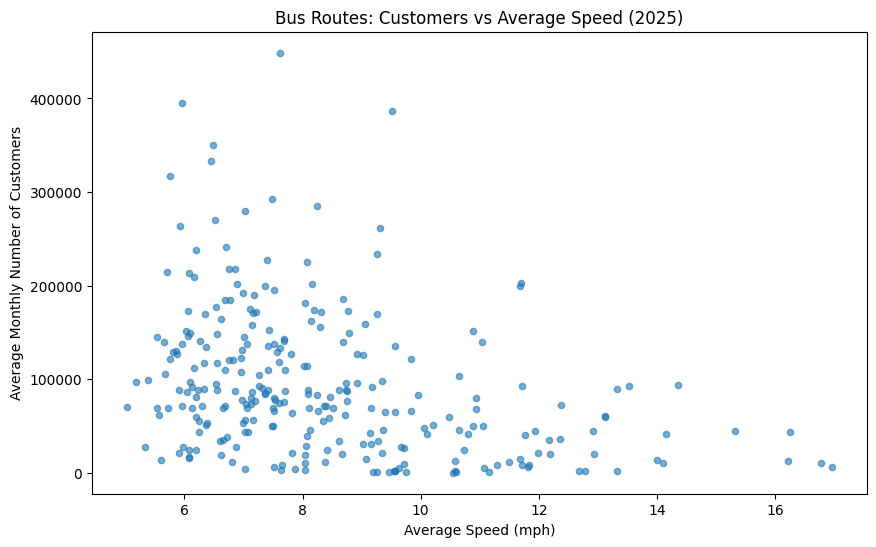

In [11]:
# Scatter plot with pandas in Jupyter Notebook
ax = merged.plot.scatter(
    x="avg_average_speed",
    y="avg_monthly_number_of_customers",
    figsize=(10, 6),
    alpha=0.6,
    title="Bus Routes: Customers vs Average Speed (2025)"
)

ax.set_xlabel("Average Speed (mph)")
ax.set_ylabel("Average Monthly Number of Customers")


Text(0, 0.5, 'Average Speed (mph)')

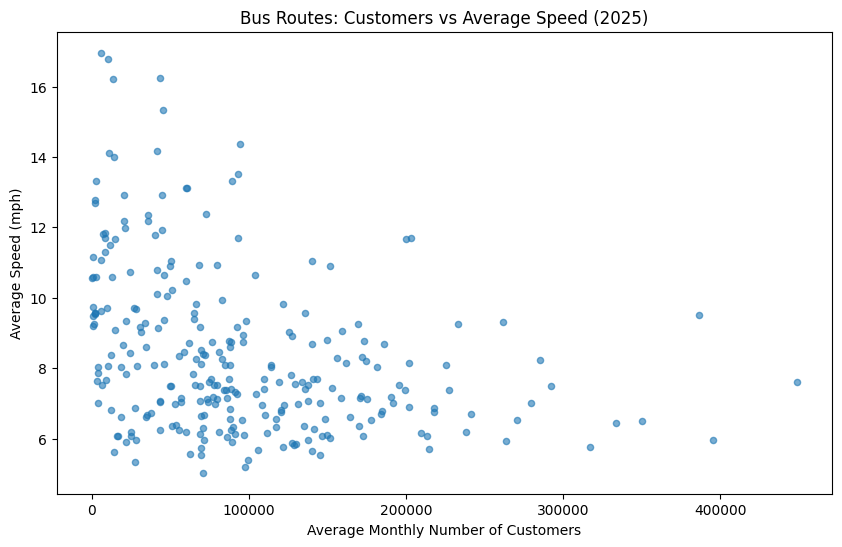

In [12]:
# Scatter plot with pandas in Jupyter Notebook
ax = merged.plot.scatter(
    x="avg_monthly_number_of_customers",
    y="avg_average_speed",
    figsize=(10, 6),
    alpha=0.6,
    title="Bus Routes: Customers vs Average Speed (2025)"
)

ax.set_xlabel("Average Monthly Number of Customers")
ax.set_ylabel("Average Speed (mph)")

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit

In [14]:
def inv_log_model(x, a, b):
    return a / np.log(x) + b


In [15]:
x = merged["avg_monthly_number_of_customers"].values
y = merged["avg_average_speed"].values


In [16]:
params, covariance = curve_fit(inv_log_model, x, y, maxfev=10000)
a, b = params
print(f"Fitted parameters: a = {a:.3f}, b = {b:.3f}")


Fitted parameters: a = 60.188, b = 2.791


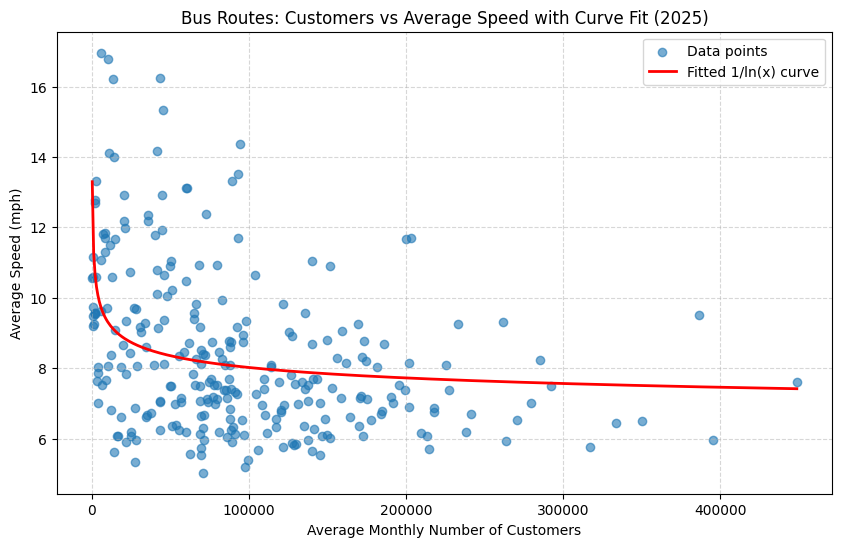

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.6, label="Data points")

# Smooth x for plotting the fitted curve
x_fit = np.linspace(x.min(), x.max(), 500)
y_fit = inv_log_model(x_fit, a, b)
plt.plot(x_fit, y_fit, color='red', linewidth=2, label=f"Fitted 1/ln(x) curve")

plt.title("Bus Routes: Customers vs Average Speed with Curve Fit (2025)")
plt.xlabel("Average Monthly Number of Customers")
plt.ylabel("Average Speed (mph)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


Fitted parameters: a = 60.188, b = 2.791
R² = 0.1362


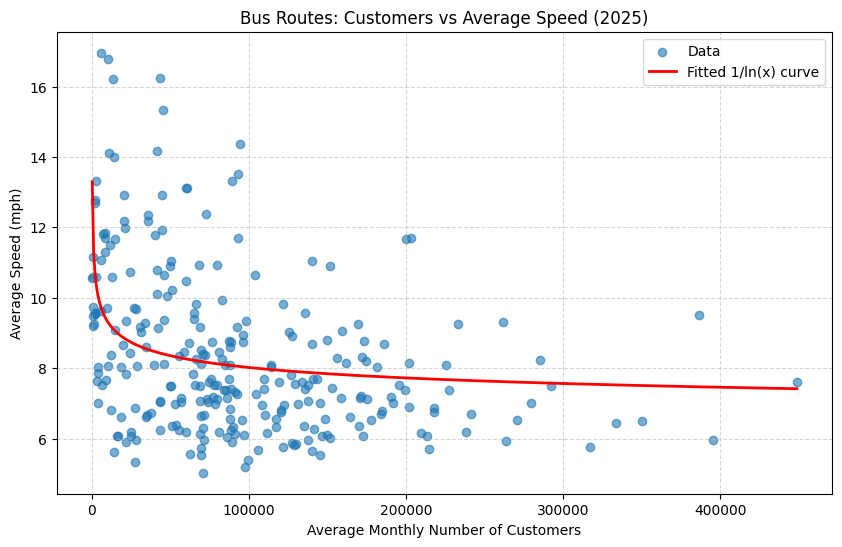

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# define model
def inv_log_model(x, a, b):
    return a / np.log(x) + b

# x and y from merged dataframe
x = merged["avg_monthly_number_of_customers"].values
y = merged["avg_average_speed"].values

# fit curve
params, covariance = curve_fit(inv_log_model, x, y, maxfev=10000)
a, b = params
print(f"Fitted parameters: a = {a:.3f}, b = {b:.3f}")

# compute R²
y_pred = inv_log_model(x, a, b)
ss_res = np.sum((y - y_pred)**2)
ss_tot = np.sum((y - np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
print(f"R² = {r_squared:.4f}")

# plot
plt.figure(figsize=(10,6))
plt.scatter(x, y, alpha=0.6, label="Data")
x_fit = np.linspace(x.min(), x.max(), 500)
plt.plot(x_fit, inv_log_model(x_fit, a, b), color='red', linewidth=2, label="Fitted 1/ln(x) curve")
plt.xlabel("Average Monthly Number of Customers")
plt.ylabel("Average Speed (mph)")
plt.title("Bus Routes: Customers vs Average Speed (2025)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


Fitted parameters: a = 60.188, b = 2.791
R² = 0.1362


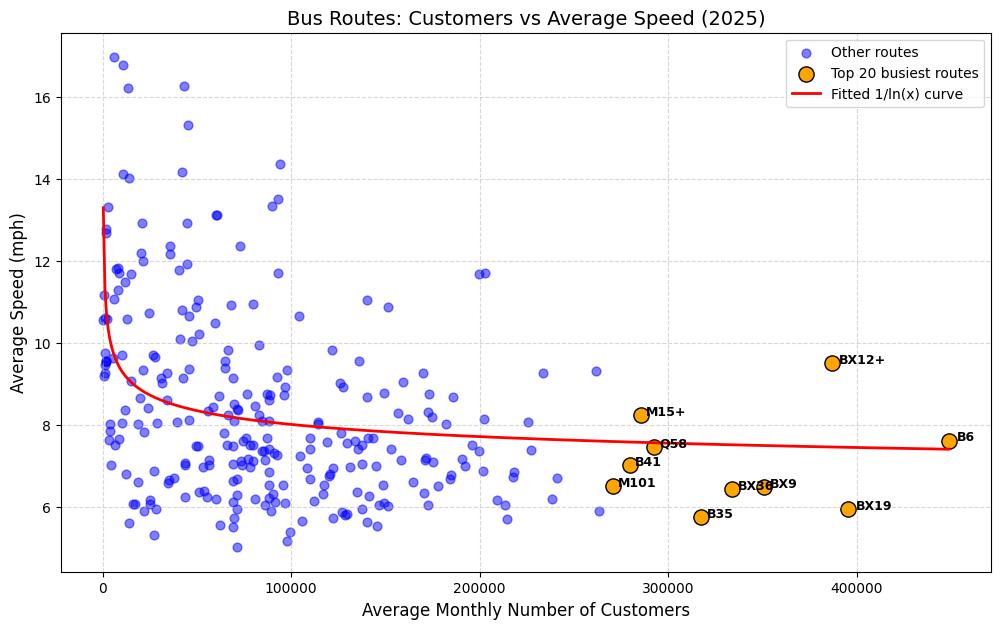

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the model function
def inv_log_model(x, a, b):
    return a / np.log(x) + b

# x and y from merged dataframe
x = merged["avg_monthly_number_of_customers"].values
y = merged["avg_average_speed"].values
routes = merged["route_id"].values

# Fit the 1/ln(x) curve
params, _ = curve_fit(inv_log_model, x, y, maxfev=10000)
a, b = params
print(f"Fitted parameters: a = {a:.3f}, b = {b:.3f}")

# Compute R²
y_pred = inv_log_model(x, a, b)
ss_res = np.sum((y - y_pred)**2)
ss_tot = np.sum((y - np.mean(y))**2)
r_squared = 1 - ss_res / ss_tot
print(f"R² = {r_squared:.4f}")

# Identify top 20 busiest routes
top20_idx = np.argsort(x)[-10:]

# Plot
plt.figure(figsize=(12,7))

# Plot all points
plt.scatter(x, y, alpha=0.5, label="Other routes", color="blue", s=40)

# Highlight top 20 busiest routes
plt.scatter(x[top20_idx], y[top20_idx], color="orange", s=120, label="Top 20 busiest routes", edgecolor="black")

# Annotate top 20
for i in top20_idx:
    plt.text(x[i]*1.01, y[i], routes[i], fontsize=9, fontweight="bold")

# Fitted curve
x_fit = np.linspace(x.min(), x.max(), 500)
plt.plot(x_fit, inv_log_model(x_fit, a, b), color='red', linewidth=2, label="Fitted 1/ln(x) curve")

# Labels & title
plt.xlabel("Average Monthly Number of Customers", fontsize=12)
plt.ylabel("Average Speed (mph)", fontsize=12)
plt.title("Bus Routes: Customers vs Average Speed (2025)", fontsize=14)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


Fitted parameters: a = 60.188, b = 2.791
R² = 0.1362


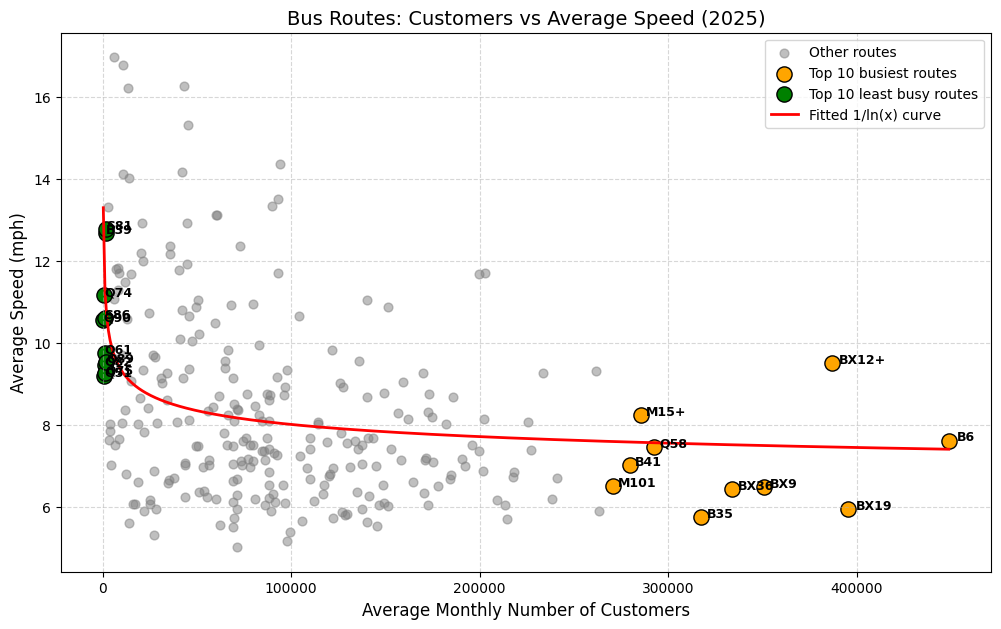

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the model function
def inv_log_model(x, a, b):
    return a / np.log(x) + b

# x and y from merged dataframe
x = merged["avg_monthly_number_of_customers"].values
y = merged["avg_average_speed"].values
routes = merged["route_id"].values

# Fit the 1/ln(x) curve
params, _ = curve_fit(inv_log_model, x, y, maxfev=10000)
a, b = params
print(f"Fitted parameters: a = {a:.3f}, b = {b:.3f}")

# Compute R²
y_pred = inv_log_model(x, a, b)
ss_res = np.sum((y - y_pred)**2)
ss_tot = np.sum((y - np.mean(y))**2)
r_squared = 1 - ss_res / ss_tot
print(f"R² = {r_squared:.4f}")

# Identify top 10 busiest and top 10 least busy routes
top10_idx = np.argsort(x)[-10:]       # top 10 busiest
bottom10_idx = np.argsort(x)[:10]     # top 10 least busy

# Plot
plt.figure(figsize=(12,7))

# Plot all points
plt.scatter(x, y, alpha=0.5, label="Other routes", color="gray", s=40)

# Highlight top 10 busiest routes
plt.scatter(x[top10_idx], y[top10_idx], color="orange", s=120, label="Top 10 busiest routes", edgecolor="black")

# Highlight top 10 least busy routes
plt.scatter(x[bottom10_idx], y[bottom10_idx], color="green", s=120, label="Top 10 least busy routes", edgecolor="black")

# Annotate top and bottom 10 routes
for i in np.concatenate([top10_idx, bottom10_idx]):
    plt.text(x[i]*1.01, y[i], routes[i], fontsize=9, fontweight="bold")

# Fitted curve
x_fit = np.linspace(x.min(), x.max(), 500)
plt.plot(x_fit, inv_log_model(x_fit, a, b), color='red', linewidth=2, label="Fitted 1/ln(x) curve")

# Labels & title
plt.xlabel("Average Monthly Number of Customers", fontsize=12)
plt.ylabel("Average Speed (mph)", fontsize=12)
plt.title("Bus Routes: Customers vs Average Speed (2025)", fontsize=14)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

